# 一起来打怪之 Credit Scoring 练习

-------
## >>>说明：
### 1. 答题步骤：
- 回答问题**请保留每一步**操作过程，请不要仅仅给出最后答案
- 请养成代码注释的好习惯

### 2. 解题思路：
- 为方便大家准确理解题目，在习题实战中有所收获，本文档提供了解题思路提示
- 解题思路**仅供参考**，鼓励原创解题方法
- 为督促同学们自己思考，解题思路内容设置为**注释**，请注意查看

### 3. 所用数据：
- 问题使用了多个数据库，请注意导入每个数据库后都先**查看和了解数据的基本性质**，后面的问题不再一一提醒

--------
## 操作题

### 信用卡欺诈项目

 #### 前期数据导入,预览及处理(此部分勿修改，涉及的数据文件无需复制移动)

In [1]:
import pandas as pd
pd.set_option('display.max_columns', 500)
import zipfile
with zipfile.ZipFile('KaggleCredit2.csv.zip', 'r') as z:
    f = z.open('KaggleCredit2.csv')
    data = pd.read_csv(f, index_col=0)
data.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,0.766127,45.0,2.0,0.802982,9120.0,13.0,0.0,6.0,0.0,2.0
1,0,0.957151,40.0,0.0,0.121876,2600.0,4.0,0.0,0.0,0.0,1.0
2,0,0.658180,38.0,1.0,0.085113,3042.0,2.0,1.0,0.0,0.0,0.0
3,0,0.233810,30.0,0.0,0.036050,3300.0,5.0,0.0,0.0,0.0,0.0
4,0,0.907239,49.0,1.0,0.024926,63588.0,7.0,0.0,1.0,0.0,0.0


In [2]:
# 检查数据维度
data.shape

(112915, 11)

In [3]:
# 查看数据缺失值情况
data.isnull().sum(axis=0)

SeriousDlqin2yrs                           0
RevolvingUtilizationOfUnsecuredLines       0
age                                     4267
NumberOfTime30-59DaysPastDueNotWorse       0
DebtRatio                                  0
MonthlyIncome                              0
NumberOfOpenCreditLinesAndLoans            0
NumberOfTimes90DaysLate                    0
NumberRealEstateLoansOrLines               0
NumberOfTime60-89DaysPastDueNotWorse       0
NumberOfDependents                      4267
dtype: int64

In [4]:
# 清除缺失值
data.dropna(inplace=True)
data.shapey = data['SeriousDlqin2yrs']
X = data.drop('SeriousDlqin2yrs', axis=1)

/tmp/ipykernel_36342/2980780030.py:3: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  data.shapey = data['SeriousDlqin2yrs']


In [5]:
# 取出对应的X和y
y = data['SeriousDlqin2yrs']
X = data.drop('SeriousDlqin2yrs', axis=1)
# 查看平均的欺诈率
y.mean()

0.06742876076872101

### 以下为操作题

#### 1.把数据切分成训练集和测试集

In [6]:
# 提示：查看train_test_split函数
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True, random_state=0)
# 训练集与测试集73分

In [7]:
# 查看数据的维度
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((76053, 10), (32595, 10), (76053,), (32595,))

SeriousDlqin2yrs
0    101322
1      7326
Name: count, dtype: int64


<Axes: xlabel='SeriousDlqin2yrs'>

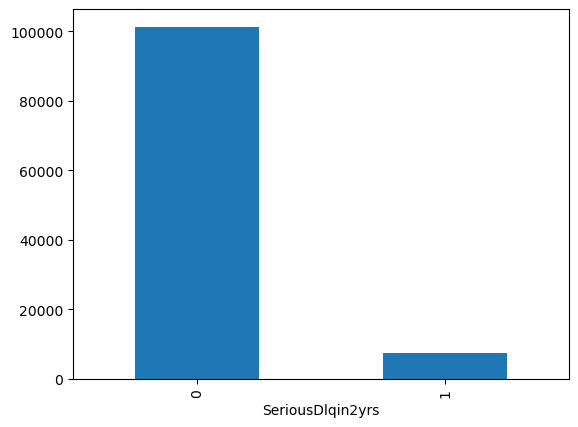

In [8]:
# 通过SeriousDlqin2yrs字段查看正负样本分布情况
# 提示：value_counts
valuecounts = data['SeriousDlqin2yrs'].value_counts()
print(valuecounts)

# 绘制两种类别的柱状图
# 提示：dataframe可以直接plot(kind='bar')
valuecounts.plot(kind='bar')


#### 2.数据预处理之离散化

In [9]:
# 请对年龄按照3岁一个区间进行离散化
# 提示：可以先计算出分桶边界，再基于pandas的cut函数进行离散化(分箱、分桶)
import numpy as np
import pandas as pd
print(np.max(data.age))
print(np.min(data.age))


103.0
0.0


In [10]:
data.age = pd.cut(data.age, bins=34, right=False)

In [11]:
data.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,0.766127,"[42.412, 45.441)",2.0,0.802982,9120.0,13.0,0.0,6.0,0.0,2.0
1,0,0.957151,"[39.382, 42.412)",0.0,0.121876,2600.0,4.0,0.0,0.0,0.0,1.0
2,0,0.658180,"[36.353, 39.382)",1.0,0.085113,3042.0,2.0,1.0,0.0,0.0,0.0
3,0,0.233810,"[27.265, 30.294)",0.0,0.036050,3300.0,5.0,0.0,0.0,0.0,0.0
4,0,0.907239,"[48.471, 51.5)",1.0,0.024926,63588.0,7.0,0.0,1.0,0.0,0.0


#### 3.数据预处理之独热向量编码

In [12]:
# 请对上述分箱后的年龄段进行独热向量编码
# 提示：使用pandas的get_dummies完成
age = pd.get_dummies(data, columns=['age'], prefix_sep='_')
age.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,"age_[0.0, 3.029)","age_[3.029, 6.059)","age_[6.059, 9.088)","age_[9.088, 12.118)","age_[12.118, 15.147)","age_[15.147, 18.176)","age_[18.176, 21.206)","age_[21.206, 24.235)","age_[24.235, 27.265)","age_[27.265, 30.294)","age_[30.294, 33.324)","age_[33.324, 36.353)","age_[36.353, 39.382)","age_[39.382, 42.412)","age_[42.412, 45.441)","age_[45.441, 48.471)","age_[48.471, 51.5)","age_[51.5, 54.529)","age_[54.529, 57.559)","age_[57.559, 60.588)","age_[60.588, 63.618)","age_[63.618, 66.647)","age_[66.647, 69.676)","age_[69.676, 72.706)","age_[72.706, 75.735)","age_[75.735, 78.765)","age_[78.765, 81.794)","age_[81.794, 84.824)","age_[84.824, 87.853)","age_[87.853, 90.882)","age_[90.882, 93.912)","age_[93.912, 96.941)","age_[96.941, 99.971)","age_[99.971, 103.103)"
0,1,0.766127,2.0,0.802982,9120.0,13.0,0.0,6.0,0.0,2.0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,0,0.957151,0.0,0.121876,2600.0,4.0,0.0,0.0,0.0,1.0,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,0,0.658180,1.0,0.085113,3042.0,2.0,1.0,0.0,0.0,0.0,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,0,0.233810,0.0,0.036050,3300.0,5.0,0.0,0.0,0.0,0.0,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,0,0.907239,1.0,0.024926,63588.0,7.0,0.0,1.0,0.0,0.0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


#### 4.数据预处理之幅度缩放

In [13]:
# 请对连续值特征进行幅度缩放
# 提示：可以使用StandardScaler等幅度缩放器进行处理
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train_std=scaler.fit_transform(X_train)
X_test_std=scaler.transform(X_test)

#### 5.使用logistic regression建模，并且输出一下系数，分析重要度。   

In [14]:
# 提示：fit建模，建完模之后可以取出coef属性
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train_std, y_train)

coefficients = model.coef_

print("Coefficients:", coefficients)


Coefficients: [[-0.01432049 -0.36429241  1.71660158  0.31218901 -0.1151493  -0.09207822
   1.6638969  -0.19674368 -3.21071999  0.11659033]]


#### 6.使用网格搜索交叉验证进行调参
调整penalty和C参数，其中penalty候选为"l1"和"l2"，C的候选为[1,10,100,500]

In [15]:
# 提示：先按照上面要求准备好网格字典，再使用GridSearchCV进行调参
from sklearn.model_selection import GridSearchCV
param_grid = {'penalty': ['l1', 'l2'], 'C': [1, 10, 100, 500]}

# 使用 GridSearchCV 调参
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_std, y_train)

# 输出最好参数
best_params = grid_search.best_params_
print("最好参数:", best_params)

# 输出最好模型的系数
best_model = grid_search.best_estimator_
coefficients = best_model.coef_
intercept = best_model.intercept_

print("Intercept:", intercept)
print("Coefficients:", coefficients)


最好参数: {'C': 10, 'penalty': 'l2'}
Intercept: [-2.85890345]
Coefficients: [[-0.01428717 -0.36429751  1.72767996  0.31211219 -0.11518815 -0.09190189
   1.68720119 -0.19646079 -3.24496378  0.11641158]]


/home/xyd/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
20 fits failed out of a total of 40.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "/home/xyd/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/xyd/anaconda3/lib/python3.11/site-packages/sklearn/base.py", line 1152, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/xyd/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py", line 116

#### 7.在测试集上进行预测，计算 查准率/查全率/auc/混淆矩阵/f1值 等测试指标

In [16]:
# 提示：在测试集上预测可以使用predict
# 提示：各种指标可以在sklearn.metrics中查到各种评估指标，分别是accuracy_score、recall_score、auc、confusion_matrix、f1_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, confusion_matrix, f1_score

# 进行预测
y_pred = model.predict(X_test_std)
y_prob = model.predict_proba(X_test_std)[:, 1]

# 计算评估指标
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)
conf_matrix = confusion_matrix(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"AUC: {roc_auc:.4f}")
print("Confusion Matrix:")
print(conf_matrix)
print(f"F1 Score: {f1:.4f}")

Accuracy: 0.9338
Precision: 0.5432
Recall: 0.0405
AUC: 0.6983
Confusion Matrix:
[[30350    74]
 [ 2083    88]]
F1 Score: 0.0754


#### 8.更多优化
银行通常会有更严格的要求，因为欺诈带来的后果通常比较严重，一般我们会调整模型的标准。   

比如在logistic regression当中，一般我们的概率判定边界为0.5，但是我们可以把阈值设定低一些，来提高模型的“敏感度”   
试试看把阈值设定为0.3，再看看这个时候的混淆矩阵等评估指标。

In [17]:
# 提示：thresholds = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
# 根据predict_proba的结果和threshold的比较确定结果，再

# 不同的阈值
thresholds = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

# 遍历不同的阈值，再评估各种结果指标
for threshold in thresholds:
    y_pred = (y_prob >= threshold).astype(int)
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_prob)
    conf_matrix = confusion_matrix(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    print(f"\nThreshold: {threshold}")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"AUC: {roc_auc:.4f}")
    print("Confusion Matrix:")
    print(conf_matrix)
    print(f"F1 Score: {f1:.4f}")


Threshold: 0.1
Accuracy: 0.8514
Precision: 0.2016
Recall: 0.4159
AUC: 0.6983
Confusion Matrix:
[[26848  3576]
 [ 1268   903]]
F1 Score: 0.2716

Threshold: 0.2
Accuracy: 0.9281
Precision: 0.4096
Recall: 0.1815
AUC: 0.6983
Confusion Matrix:
[[29856   568]
 [ 1777   394]]
F1 Score: 0.2515

Threshold: 0.3
Accuracy: 0.9336
Precision: 0.5079
Recall: 0.1041
AUC: 0.6983
Confusion Matrix:
[[30205   219]
 [ 1945   226]]
F1 Score: 0.1728

Threshold: 0.4
Accuracy: 0.9341
Precision: 0.5476
Recall: 0.0636
AUC: 0.6983
Confusion Matrix:
[[30310   114]
 [ 2033   138]]
F1 Score: 0.1139

Threshold: 0.5
Accuracy: 0.9338
Precision: 0.5432
Recall: 0.0405
AUC: 0.6983
Confusion Matrix:
[[30350    74]
 [ 2083    88]]
F1 Score: 0.0754

Threshold: 0.6
Accuracy: 0.9338
Precision: 0.5660
Recall: 0.0276
AUC: 0.6983
Confusion Matrix:
[[30378    46]
 [ 2111    60]]
F1 Score: 0.0527

Threshold: 0.7
Accuracy: 0.9336
Precision: 0.5522
Recall: 0.0170
AUC: 0.6983
Confusion Matrix:
[[30394    30]
 [ 2134    37]]
F1 Score:

#### 9.尝试对不同特征的重要度进行排序，通过特征选择的方式，对特征进行筛选。并重新建模，观察此时的模型准确率等评估指标。

In [18]:
# 可以根据逻辑回归的系数绝对值大小进行排序，也可以基于树模型的特征重要度进行排序
# 特征选择可以使用RFE或者selectFromModel

# 这里使用逻辑回归的系数绝对值大小进行排序，特征选择使用RFE
feature_importance = abs(model.coef_[0])

# 根据特征重要性进行排序
sorted_features = pd.DataFrame({'Importance': feature_importance})
sorted_features = sorted_features.sort_values(by='Importance', ascending=False)

sorted_features.head()


,Importance
8,3.210720
2,1.716602
6,1.663897
1,0.364292
3,0.312189


In [19]:
feat_labels = data.columns[1:]
indices = np.argsort(feature_importance)[::-1]

for f in range(X_train.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 50, 
                            feat_labels[indices[f]], 
                            feature_importance[indices[f]]))

 1) NumberOfTime60-89DaysPastDueNotWorse               3.210720
 2) NumberOfTime30-59DaysPastDueNotWorse               1.716602
 3) NumberOfTimes90DaysLate                            1.663897
 4) age                                                0.364292
 5) DebtRatio                                          0.312189
 6) NumberRealEstateLoansOrLines                       0.196744
 7) NumberOfDependents                                 0.116590
 8) MonthlyIncome                                      0.115149
 9) NumberOfOpenCreditLinesAndLoans                    0.092078
10) RevolvingUtilizationOfUnsecuredLines               0.014320


In [20]:
from sklearn.feature_selection import RFE
# 使用 RFE 进行特征选择
rfe = RFE(model, n_features_to_select=1)
X_train_rfe = rfe.fit_transform(X_train_std, y_train)
feature_indices = rfe.support_

# 重新构建数据集
X_train_selected = X_train.iloc[:, feature_indices]
X_test_selected = X_test.iloc[:, feature_indices]

# 重新建模
model_selected = LogisticRegression()
model_selected.fit(X_train_selected, y_train)

# 进行预测
y_pred_selected = model_selected.predict(X_test_selected)
y_prob_selected = model_selected.predict_proba(X_test_selected)[:, 1]

# 计算评估指标
accuracy_selected = accuracy_score(y_test, y_pred_selected)
precision_selected = precision_score(y_test, y_pred_selected)
recall_selected = recall_score(y_test, y_pred_selected)
roc_auc_selected = roc_auc_score(y_test, y_prob_selected)
conf_matrix_selected = confusion_matrix(y_test, y_pred_selected)
f1_selected = f1_score(y_test, y_pred_selected)

print(f"Accuracy: {accuracy_selected:.4f}")
print(f"Precision: {precision_selected:.4f}")
print(f"Recall: {recall_selected:.4f}")
print(f"AUC: {roc_auc_selected:.4f}")
print("Confusion Matrix:")
print(conf_matrix_selected)
print(f"F1 Score: {f1_selected:.4f}")

Accuracy: 0.9335
Precision: 0.5263
Recall: 0.0092
AUC: 0.6565
Confusion Matrix:
[[30406    18]
 [ 2151    20]]
F1 Score: 0.0181


#### 10.其他模型算法尝试
使用RandomForestClassifier/SVM/KNN等sklearn分类算法进行分类，尝试上述超参数调优算法过程。

In [21]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

In [22]:
# Random Forest
rf_model = RandomForestClassifier(n_jobs=-1)
rf_param_grid = {'n_estimators': [50, 100],
                 'max_depth': [None, 10],
                 'min_samples_split': [2, 5],
                 'min_samples_leaf': [1, 2]}
rf_grid_search = GridSearchCV(rf_model, rf_param_grid, cv=3, scoring='accuracy')
rf_grid_search.fit(X_train_std, y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(n_jobs=-1),
             param_grid={'max_depth': [None, 10], 'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [50, 100]},
             scoring='accuracy')

In [26]:
# SVM
svm_model = SVC(random_state=0, max_iter=100000)
# 限制最大迭代次数
svm_param_grid = {'C': [0.1, 1, 10],
                  'kernel': ['linear', 'rbf']}
svm_grid_search = GridSearchCV(svm_model, svm_param_grid, cv=3, scoring='accuracy')
svm_grid_search.fit(X_train_std, y_train)

/home/xyd/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/xyd/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/xyd/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/xyd/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/xyd/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarnin

GridSearchCV(cv=3, estimator=SVC(max_iter=100000, random_state=0),
             param_grid={'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']},
             scoring='accuracy')

In [23]:
# KNN
knn_model = KNeighborsClassifier(n_jobs=-1)
knn_param_grid = {'n_neighbors': [3, 5, 7],
                  'weights': ['uniform', 'distance'],
                  'p': [1, 2]}
knn_grid_search = GridSearchCV(knn_model, knn_param_grid, cv=3, scoring='accuracy')
knn_grid_search.fit(X_train_std, y_train)

GridSearchCV(cv=3, estimator=KNeighborsClassifier(n_jobs=-1),
             param_grid={'n_neighbors': [3, 5, 7], 'p': [1, 2],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [27]:
print("Random Forest Best Parameters:", rf_grid_search.best_params_)
print("SVM Best Parameters:", svm_grid_search.best_params_)
print("KNN Best Parameters:", knn_grid_search.best_params_)

Random Forest Best Parameters: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}
SVM Best Parameters: {'C': 10, 'kernel': 'rbf'}
KNN Best Parameters: {'n_neighbors': 7, 'p': 2, 'weights': 'uniform'}


In [30]:
# 使用最优参数重新建模
rf_best_model = rf_grid_search.best_estimator_
svm_best_model = svm_grid_search.best_estimator_
knn_best_model = knn_grid_search.best_estimator_

# 进行预测
rf_y_pred = rf_best_model.predict(X_test_std)
svm_y_pred = svm_best_model.predict(X_test_std)
knn_y_pred = knn_best_model.predict(X_test_std)

# 计算评估指标
rf_accuracy = accuracy_score(y_test, rf_y_pred)
svm_accuracy = accuracy_score(y_test, svm_y_pred)
knn_accuracy = accuracy_score(y_test, knn_y_pred)

print("Random Forest Accuracy:", rf_accuracy)
print("SVM Accuracy:", svm_accuracy)
print("KNN Accuracy:", knn_accuracy)

Random Forest Accuracy: 0.9370148795827581
SVM Accuracy: 0.9360331339162449
KNN Accuracy: 0.9342843994477681
